In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

In [4]:
df=pd.read_csv(r"C:\Users\spandana.s\OneDrive\Desktop\student_performance.csv")
df

,Hours_Studied,Previous_Scores,Extracurricular,Sleep_Hours,Internet_Access,Attendance,Performance
0,2,40,No,6,Yes,70,Low
1,5,60,Yes,7,Yes,80,Medium
2,8,85,No,8,Yes,90,High
3,1,35,No,5,No,60,Low
4,6,75,Yes,7,Yes,85,High
5,4,55,Yes,6,Yes,78,Medium
6,3,45,No,7,No,72,Low
7,7,80,Yes,8,Yes,95,High
8,5,65,No,6,Yes,82,Medium
9,2,50,Yes,5,No,68,Low


In [5]:
df.shape

(20, 7)

In [6]:
df.head(5)

,Hours_Studied,Previous_Scores,Extracurricular,Sleep_Hours,Internet_Access,Attendance,Performance
0,2,40,No,6,Yes,70,Low
1,5,60,Yes,7,Yes,80,Medium
2,8,85,No,8,Yes,90,High
3,1,35,No,5,No,60,Low
4,6,75,Yes,7,Yes,85,High


In [7]:
df.isnull().sum()

Hours_Studied      0
Previous_Scores    0
Extracurricular    0
Sleep_Hours        0
Internet_Access    0
Attendance         0
Performance        0
dtype: int64

In [8]:
df["Extracurricular"] = df["Extracurricular"].map({"No": 0, "Yes": 1})
df["Internet_Access"] = df["Internet_Access"].map({"No": 0, "Yes": 1})
df.head()

,Hours_Studied,Previous_Scores,Extracurricular,Sleep_Hours,Internet_Access,Attendance,Performance
0,2,40,0,6,1,70,Low
1,5,60,1,7,1,80,Medium
2,8,85,0,8,1,90,High
3,1,35,0,5,0,60,Low
4,6,75,1,7,1,85,High


In [9]:
X = df.drop("Performance", axis=1)   
y = df["Performance"] 

In [10]:
print("Features (X):")
X.head()

Features (X):


,Hours_Studied,Previous_Scores,Extracurricular,Sleep_Hours,Internet_Access,Attendance
0,2,40,0,6,1,70
1,5,60,1,7,1,80
2,8,85,0,8,1,90
3,1,35,0,5,0,60
4,6,75,1,7,1,85


In [11]:
print("\nTarget (y):")
y.head()


Target (y):


0       Low
1    Medium
2      High
3       Low
4      High
Name: Performance, dtype: object

In [12]:
X_train, X_test, y_train, y_test = train_test_split(   X, y, test_size=0.3, random_state=42)

In [13]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14, 6)
X_test shape: (6, 6)
y_train shape: (14,)
y_test shape: (6,)


In [14]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- Internet_Access <= 0.50
|   |--- class: Low
|--- Internet_Access >  0.50
|   |--- Sleep_Hours <= 6.50
|   |   |--- class: Medium
|   |--- Sleep_Hours >  6.50
|   |   |--- class: High



In [16]:
y_pred = clf.predict(X_test)

print("Predicted labels:", y_pred)
print("Actual labels:   ", y_test.values)


Predicted labels: ['Medium' 'High' 'High' 'High' 'Medium' 'Medium']
Actual labels:    ['Low' 'High' 'Medium' 'Medium' 'Medium' 'Medium']


In [17]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.5


In [18]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
print("\nConfusion Matrix:\n", cm)



Confusion Matrix:
 [[1 0 0]
 [0 0 1]
 [2 0 2]]


In [19]:
cr = classification_report(y_test, y_pred, target_names=clf.classes_)
print("\nClassification Report:\n", cr)


Classification Report:
               precision    recall  f1-score   support

        High       0.33      1.00      0.50         1
         Low       0.00      0.00      0.00         1
      Medium       0.67      0.50      0.57         4

    accuracy                           0.50         6
   macro avg       0.33      0.50      0.36         6
weighted avg       0.50      0.50      0.46         6



C:\Users\spandana.s\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\spandana.s\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\spandana.s\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [20]:
criteria = ["gini", "entropy"]
depths = [None, 2, 3, 4]

results = []

for crit in criteria:
    for depth in depths:
        clf = DecisionTreeClassifier(criterion=crit, max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((crit, depth, acc))

print("Criterion | Max Depth | Accuracy")
print("--------------------------------")
for crit, depth, acc in results:
    print(f"{crit:8} | {str(depth):9} | {acc:.2f}")

Criterion | Max Depth | Accuracy
--------------------------------
gini     | None      | 0.50
gini     | 2         | 0.50
gini     | 3         | 0.50
gini     | 4         | 0.50
entropy  | None      | 0.50
entropy  | 2         | 0.50
entropy  | 3         | 0.50
entropy  | 4         | 0.50


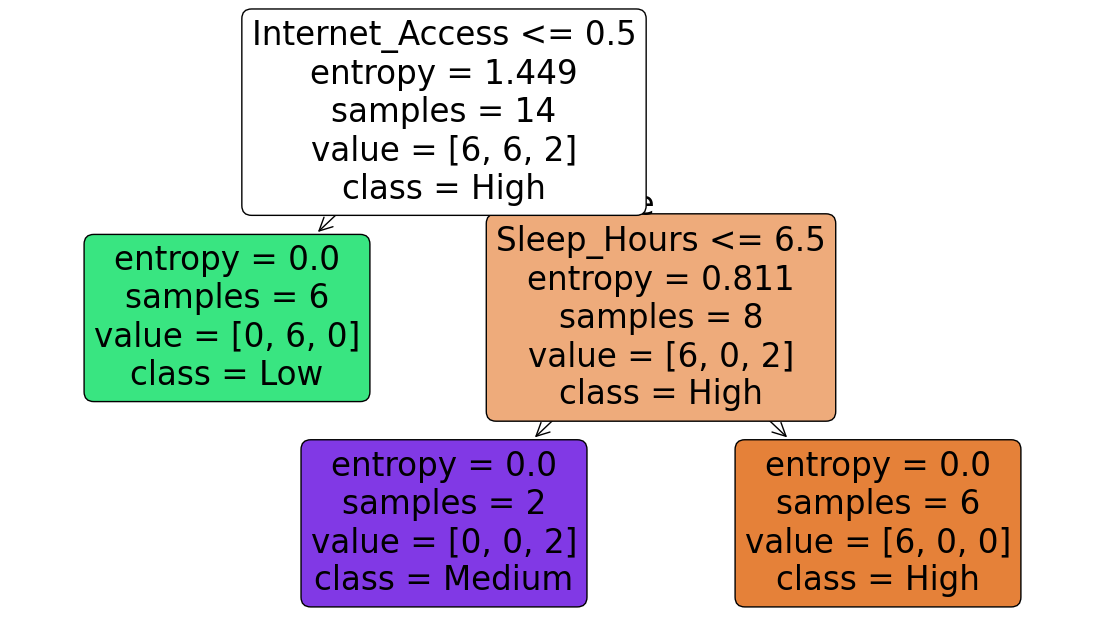

In [24]:
le = LabelEncoder()
y = le.fit_transform(df["Performance"])
plt.figure(figsize=(14,8))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.show()

In [28]:
fi_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances:\n", fi_df)


Feature Importances:
            Feature  Importance
4  Internet_Access    0.680023
3      Sleep_Hours    0.319977
1  Previous_Scores    0.000000
0    Hours_Studied    0.000000
2  Extracurricular    0.000000
5       Attendance    0.000000


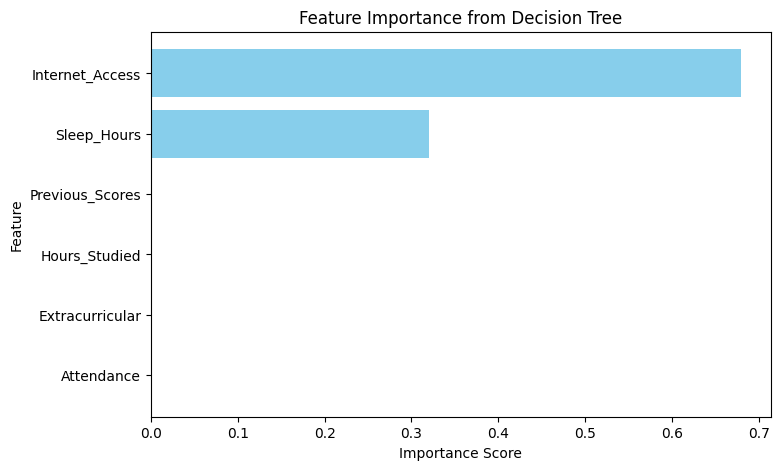

In [29]:
plt.figure(figsize=(8,5))
plt.barh(fi_df["Feature"], fi_df["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance from Decision Tree")
plt.gca().invert_yaxis()
plt.show()